# Amazon Review Data 활용하기
1. 데이터셋 버전
  - 2013 버전([링크](http://snap.stanford.edu/data/web-Amazon-links.html))
  - 2014 버전([링크](https://jmcauley.ucsd.edu/data/amazon/))
  - 2018 버전([링크](https://nijianmo.github.io/amazon/index.html))
2. 2018버전 데이터셋 정보
  - reviews(ratings, text, helpfulness votes)
  - product metadata(descriptions, category information, price band and image features)
  - links(also viewed/also bought graphs)
  - 이외 추가 정보는 웹사이트 참고
  - 최근(2020-08-07)까지 업데이트된 내용이 있다
3. 데이터셋 크기가 매우 크기 때문에, `Complete review data`보다 `Small subsets 데이터`를 먼저 사용하는 것을 추천한다

In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## data 다운로드하기

### 1. wget command 활용

In [3]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz

--2021-08-12 12:26:33--  http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7010521 (6.7M) [application/octet-stream]
Saving to: ‘meta_Computers.json.gz’

meta_Computers.json 100%[===================>]   6.69M  4.96MB/s    in 1.3s    

2021-08-12 12:26:35 (4.96 MB/s) - ‘meta_Computers.json.gz’ saved [7010521/7010521]



In [4]:
### load the meta data
data = []
with gzip.open('meta_Computers.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

18772
{'description': ['Brand new. Still in factory-sealed plastic.'], 'title': 'Kelby Training DVD: The Adobe Photoshop CS5 7-Point System for Camera Raw By Scott Kelby', 'image': ['https://images-na.ssl-images-amazon.com/images/I/31IlLImCVJL._SS40_.jpg'], 'brand': 'Kelby Training', 'rank': ['>#654,681 in Electronics (See Top 100 in Electronics)'], 'main_cat': 'Computers', 'date': 'December 2, 2011', 'asin': '0321732960'}


In [5]:
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)
print(len(df))

18772


In [6]:
df.head()

,description,title,image,brand,rank,main_cat,date,asin,feature,tech1,also_buy,price,also_view,tech2,details,similar_item
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...",Computers,"November 7, 2011",0321735722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...",Computers,"June 6, 2007",0439651859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...",Computers,"December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,NaN,Nook,"[>#85,661 in Computers & Accessories (See top ...",Computers,"September 11, 2013",0594450284,[Cheetah cover],"{'Brand Name': 'Nook', 'Item Weight': '1 pound...",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# remove rows with unformatted title (i.e. some 'title' may still contain html style content)
df_fillna = df.fillna('')
df_get_time = df_fillna[df_fillna.title.str.contains('getTime')] # unformatted rows
df_without_get_time = df_fillna[~df_fillna.title.str.contains('getTime')] # filter those unformatted rows
print(len(df_get_time))
print(len(df_without_get_time))

135
18637


In [8]:
# how those unformatted rows look like
df_get_time.iloc[0]

description                                                      
title           var aPageStart = (new Date()).getTime();\nvar ...
image                                                            
brand                                              DS Miller Inc.
rank            [>#1,826,312 in Electronics (See Top 100 in El...
main_cat                                                Computers
date                                                March 1, 2010
asin                                                   B0016C5EXY
feature                                                          
tech1                                                            
also_buy                                                         
price                                                            
also_view                                                        
tech2                                                            
details                                                          
similar_it

### 직접 다운로드

In [9]:
path = '/content/drive/MyDrive/data/amazon_reviews'

#### Read CSV file for ratings only

- (itme, user, rating, timestamp)

In [10]:
ratings_df = pd.read_csv(os.path.join(path, 'ratings_Musical_Instruments.csv'), header=None, names=['item','user','rating','timestamp'], encoding='utf-8')

In [11]:
print(ratings_df.shape)
print(ratings_df.head())

(500176, 4)
             item        user  rating   timestamp
0  A1YS9MDZP93857  0006428320     3.0  1394496000
1  A3TS466QBAWB9D  0014072149     5.0  1370476800
2  A3BUDYITWUSIS7  0041291905     5.0  1381708800
3  A19K10Z0D2NTZK  0041913574     5.0  1285200000
4  A14X336IB4JD89  0201891859     1.0  1350432000


In [12]:
data = []
with open(os.path.join(path, 'reviews_Musical_Instruments_5.json'), 'r', encoding='utf-8') as f:
    for l in f:
        data.append(json.loads(l.strip()))

#### Read JSON file
  - users and items with reviews each
  - 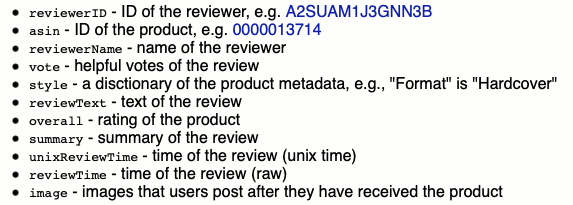

In [13]:
all_df = pd.DataFrame.from_dict(data)
print(all_df.shape)
print(all_df.columns)

(10261, 9)
Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')


In [14]:
all_df = all_df[['reviewerID', 'asin', 'helpful', 'reviewText', 'overall']]
print(all_df.head())

       reviewerID  ... overall
0  A2IBPI20UZIR0U  ...     5.0
1  A14VAT5EAX3D9S  ...     5.0
2  A195EZSQDW3E21  ...     5.0
3  A2C00NNG1ZQQG2  ...     5.0
4   A94QU4C90B1AX  ...     5.0

[5 rows x 5 columns]


In [15]:
all_df.head()

,reviewerID,asin,helpful,reviewText,overall
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0


## Analyze data

- reviewer와 item unique 수
- reviewer가 평균 review를 준 item 수

In [16]:
# number of unique reviewers
print(len(all_df['reviewerID'].unique()))
# number of unique items
print(len(all_df['asin'].unique()))

1429
900


In [17]:
reviewer_info_df = pd.concat([all_df.groupby(by='reviewerID')['asin'].count(), 
                              all_df.groupby(by='reviewerID')['overall'].mean()], axis=1)
reviewer_info_df.columns = ['number_of_items','average_ratings']
print(reviewer_info_df.head())
print(reviewer_info_df.shape)

                       number_of_items  average_ratings
reviewerID                                             
A00625243BI8W1SSZNLMD                8         4.875000
A10044ECXDUVKS                       6         3.666667
A102MU6ZC9H1N6                       6         4.666667
A109JTUZXO61UY                       5         5.000000
A109ME7C09HM2M                       5         5.000000
(1429, 2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f492f631e10>,
      dtype=object)

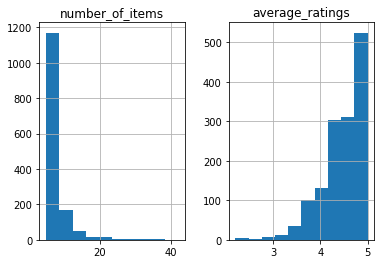

In [18]:
# review를 쓴 평균 item 수, item의 평균 평점
reviewer_info_df.hist()

# 사용자별로 편차가 심하다는 것을 알 수 있음

## Preprocess text data

In [19]:
import re

In [20]:
removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●,  , ■, (, ), \", >>, `, /, -,∼,=,ㆍ<,>, .,?, !,【,】, …, ◆,%"

def preprocess_sent(sentence):
    sentence = re.sub("[.,\'\"’‘”“!?]", "", sentence)
    sentence = re.sub("[^0-9a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)
    
    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()

    return sentence

In [21]:
all_df = all_df[['reviewText','overall']]
all_df.dropna(how='any', inplace=True)
all_df['reviewText'] = all_df['reviewText'].apply(lambda x: preprocess_sent(str(x).replace('\t',' ').replace('\n',' ')))
all_df['reviewText'] = all_df['reviewText'].apply(lambda x: ' '.join(x.split(' ')[:30]))

print(all_df.shape)

(10261, 2)


In [22]:
all_df['num_lengths'] = all_df['reviewText'].apply(lambda x: len(x.split(' ')))
all_df = all_df[all_df.num_lengths > 10]

In [23]:
all_df.drop('num_lengths', axis=1, inplace=True)
print(all_df.shape)
all_df.to_csv(os.path.join(path, 'Software_reviewText.csv'), sep='\t', encoding='utf-8')

(10198, 2)


In [24]:
all_df['reviewText'].iloc[0]

'Not much to write about here but it does exactly what its supposed to filters out the pop sounds now my recordings are much more crisp it is one of'

In [25]:
all_df['overall'].iloc[0]

5.0

## Load Dataset

In [26]:
import torch
from torchtext.legacy import data
from torchtext import datasets
import random

In [27]:
SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy')
LABEL = data.LabelField()

In [28]:
fields = [(None, None), ('text', TEXT), ('label', LABEL)]

# Load Custom dataset
training_data = data.TabularDataset(path=os.path.join(path,'Software_reviewText.csv'),
                                  format ='tsv', fields = fields, skip_header = True)

# Print sample text
print(vars(training_data.examples[0]))

{'text': ['Not', 'much', 'to', 'write', 'about', 'here', 'but', 'it', 'does', 'exactly', 'what', 'its', 'supposed', 'to', 'filters', 'out', 'the', 'pop', 'sounds', 'now', 'my', 'recordings', 'are', 'much', 'more', 'crisp', 'it', 'is', 'one', 'of'], 'label': '5.0'}


In [29]:
MAX_VOCAB_SIZE = 25000

# Pre-trained embedding을 사용하고자 한다면 아래를 실행하자
# TEXT.build_vocab(train_data, 
#                  max_size = MAX_VOCAB_SIZE, 
#                  vectors = "glove.6B.100d", 
#                  unk_init = torch.Tensor.normal_)

TEXT.build_vocab(training_data, 
                 max_size = MAX_VOCAB_SIZE)

LABEL.build_vocab(training_data)

In [30]:
print(TEXT.vocab.stoi)
print(LABEL.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f48c986ba10>>, {'<unk>': 0, '<pad>': 1, 'I': 2, 'the': 3, 'a': 4, 'and': 5, 'to': 6, 'it': 7, 'is': 8, 'for': 9, 'of': 10, 'my': 11, 'this': 12, 'on': 13, 'have': 14, 'with': 15, 'that': 16, 'in': 17, 'but': 18, 'guitar': 19, 'you': 20, 'are': 21, 'nt': 22, 'This': 23, 'these': 24, 'great': 25, 'The': 26, 'was': 27, 'as': 28, 'not': 29, 'It': 30, 'one': 31, 'use': 32, 'good': 33, 'very': 34, 'strings': 35, 'like': 36, 'well': 37, 'they': 38, 'so': 39, 'do': 40, 'just': 41, 'sound': 42, 've': 43, 'all': 44, 'its': 45, 'be': 46, 'them': 47, 'or': 48, 'can': 49, 'bought': 50, 'works': 51, 'really': 52, 'does': 53, 'price': 54, 'at': 55, 'had': 56, 'pedal': 57, 'more': 58, 'an': 59, 'your': 60, 'little': 61, 'quality': 62, 'has': 63, 'up': 64, 'used': 65, 'what': 66, 'than': 67, 'would': 68, 'out': 69, 'They': 70, 'when': 71, 'picks': 72, 'about': 73, 'me': 74, 'from': 75, 'get': 76, 'i': 77, '

In [31]:
BATCH_SIZE = 64

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_data, valid_data = training_data.split(split_ratio=0.8, random_state = random.seed(1234))

train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, valid_data), 
    sort_key = lambda x: len(x.text),
    sort_within_batch=False,
    batch_size = BATCH_SIZE
)

## Model Architecture

- Yoon Kim, 2014, Convolutional Neural Networks for Sentence Classification

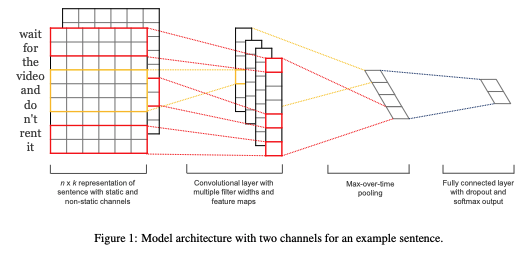

In [32]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        text = text.permute(1, 0)

        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [33]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = len(LABEL.vocab)
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [34]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 1,601,905 trainable parameters


In [35]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

## Train model

In [36]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# model = model.to(device)
# criterion = criterion.to(device)

In [38]:
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    # y stores the index of the label 
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [39]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text)
        
        loss = criterion(predictions, batch.label)
        
        acc = categorical_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        # .item() -> to get just scalar value
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
        # mean of the loss throughout the examples
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [40]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text)
            
            loss = criterion(predictions, batch.label)
            
            acc = categorical_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [41]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [42]:
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'cnn-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 1.059 | Train Acc: 63.69%
	 Val. Loss: 0.900 |  Val. Acc: 69.31%
Epoch: 02 | Epoch Time: 0m 8s
	Train Loss: 0.940 | Train Acc: 66.76%
	 Val. Loss: 0.888 |  Val. Acc: 69.26%
Epoch: 03 | Epoch Time: 0m 8s
	Train Loss: 0.893 | Train Acc: 67.20%
	 Val. Loss: 0.871 |  Val. Acc: 69.21%
Epoch: 04 | Epoch Time: 0m 8s
	Train Loss: 0.852 | Train Acc: 68.45%
	 Val. Loss: 0.867 |  Val. Acc: 69.50%
Epoch: 05 | Epoch Time: 0m 8s
	Train Loss: 0.807 | Train Acc: 69.41%
	 Val. Loss: 0.879 |  Val. Acc: 69.52%
Epoch: 06 | Epoch Time: 0m 8s
	Train Loss: 0.770 | Train Acc: 70.59%
	 Val. Loss: 0.871 |  Val. Acc: 69.60%
Epoch: 07 | Epoch Time: 0m 8s
	Train Loss: 0.703 | Train Acc: 73.27%
	 Val. Loss: 0.879 |  Val. Acc: 70.29%
Epoch: 08 | Epoch Time: 0m 8s
	Train Loss: 0.664 | Train Acc: 74.50%
	 Val. Loss: 0.882 |  Val. Acc: 68.62%
Epoch: 09 | Epoch Time: 0m 8s
	Train Loss: 0.613 | Train Acc: 76.71%
	 Val. Loss: 0.881 |  Val. Acc: 69.31%
Epoch: 10 | Epoch Time: 0m 8

## Evaluate Model

In [43]:
model.load_state_dict(torch.load('cnn-model.pt'))

import spacy
nlp = spacy.load('en')

def predict_class(model, sentence, min_len = 4):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    tensor = torch.LongTensor(indexed)
    tensor = tensor.unsqueeze(1)
    preds = model(tensor)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [44]:
pred_class = predict_class(model, "best item")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 0 = 5.0


In [45]:
pred_class = predict_class(model, "worst item")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 0 = 5.0


In [46]:
pred_class = predict_class(model, "it was best item, but requires to be fixed")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 2 = 3.0
